In [ ]:
from torch.utils.data import  DataLoader
from LIDC_data import LIDC_Dataset
import torch
import pandas as pd
import torchio as tio
import matplotlib.pyplot as plt

In [3]:
from torch.utils.data import  DataLoader
from LIDC_data import LIDC_Dataset
import torch
import pandas as pd
import torchio as tio
import matplotlib.pyplot as plt

/home/lijin/ai/dev/shinra/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
train_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/train_malB.csv')
test_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/test_malB.csv')
total_train_data = len(train_data)
total_test_data = len(test_data)
print('total_train_data:',total_train_data, 'total_test_data:',total_test_data)

total_train_data: 5495 total_test_data: 2354


In [14]:
train_data[0][0]

tensor([[[ -988.,  -987., -1000.,  ...,  -990.,  -999.,  -988.],
         [ -996.,  -988.,  -986.,  ...,  -991.,  -985.,  -989.],
         [-1000.,  -994.,  -989.,  ...,  -973.,  -998.,  -987.],
         ...,
         [ -672.,  -871.,  -902.,  ...,  -988.,  -999.,  -998.],
         [ -285.,  -662.,  -894.,  ...,  -980.,  -981.,  -999.],
         [  143.,  -245.,  -648.,  ...,  -993.,  -998.,  -997.]]])

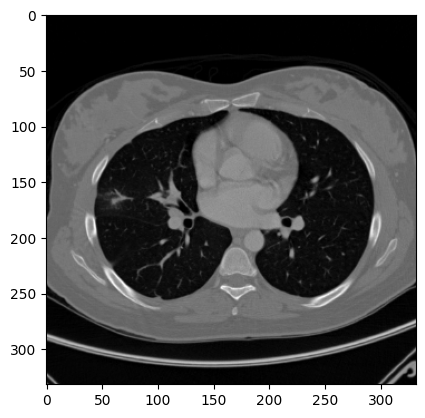

In [16]:
#.permute(1,2,0)
plt.imshow(train_data[0][0][0], cmap='gray')

In [56]:
train_data[0][0].shape

torch.Size([1, 332, 332])

In [100]:
prep_tr = [
    tio.Clamp(-1000,400),
    tio.RescaleIntensity((0,1), in_min_max=(-1000,400)),
#    tio.Lambda(lambda x: x.unsqueeze(-1)),
    tio.CropOrPad((1,384,384),padding_mode='minimum')
]

aug_tr = [
    tio.RandomAffine(scales=0, degrees=(45,0,0)),
    # tio.RandomFlip(axes=2,flip_probability=1),
    tio.RandomNoise(std=(0,0.1))
]
trans0 = tio.Compose(prep_tr + aug_tr)
imgtr0  = trans0(train_data[0][0].unsqueeze(0))

In [77]:
imgtr0.shape

torch.Size([1, 1, 384, 384])

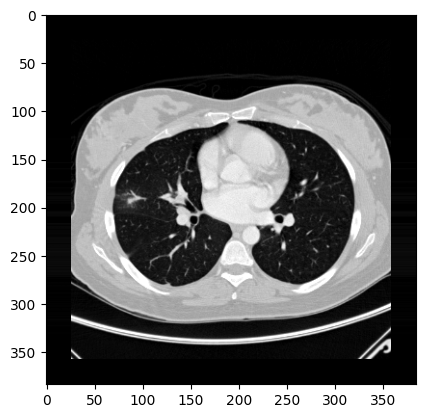

In [85]:
plt.imshow(imgtr0[0][0], cmap='gray')

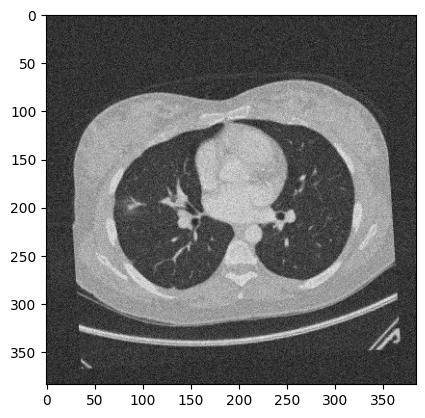

In [101]:
plt.imshow(imgtr0[0][0], cmap='gray')

In [ ]:
#before croporpad, we need to clamp and rescaleintensity to remove negative values
tio.CropOrPad(train_data[0][0].permute(1,2,0),[384,384,1])

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [3]:
trainloader = DataLoader(train_data, batch_size=8, shuffle=True)

In [ ]:
d_iter = iter(trainloader)
batch = next(d_iter)
print(batch)

RuntimeError: stack expects each tensor to be equal size, but got [1, 300, 300] at entry 0 and [1, 405, 405] at entry 1

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # transforms.Lambda(lambda img: torch.stack([transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transforms.ToTensor()(transforms.CenterCrop(192)(img.rotate(angle)))) for angle in angles])),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [17]:
train_dataset[0][0]
# print(torch.max(train_dataset[0][0],dim=0))

tensor([[[ -988.,  -987., -1000.,  ...,  -990.,  -999.,  -988.],
         [ -996.,  -988.,  -986.,  ...,  -991.,  -985.,  -989.],
         [-1000.,  -994.,  -989.,  ...,  -973.,  -998.,  -987.],
         ...,
         [ -672.,  -871.,  -902.,  ...,  -988.,  -999.,  -998.],
         [ -285.,  -662.,  -894.,  ...,  -980.,  -981.,  -999.],
         [  143.,  -245.,  -648.,  ...,  -993.,  -998.,  -997.]]])

In [16]:
pd.Series(train_dataset[0][0].view(-1)).describe()

count    110224.000000
mean       -465.856537
std         503.741180
min       -1000.000000
25%        -942.000000
50%        -778.000000
75%          28.000000
max        1268.000000
dtype: float64

In [ ]:

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)